# Digit Recogniser - Neural Networks

## Introduction

The project was done as apart of self study and self growth.

The dataset used is from MNIST. MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

## Problem Description

The goal is to correctly identify digits from the dataset of tens of thousands of handwritten images.

## Dataset

There are 785 columns and 42000 entries in the dataset, where the values are pixels and a label column.
The dataset was provided as two csv files, one contains the training data and the other testing data.

## Plan of Action

* Firstly, intensive exploratory data analysis has to be done to detect potential issues such as missing values, imbalance in class labels.

* Secondly, The issues are to be handled, The values are normalized.

* Finally, classification machine learning models will be built to identify the numbers. 

A neural network model is built in this project


### Import the libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf


from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

### Load the data

In [302]:
data = pd.read_csv('digit_train.csv')
testdata = pd.read_csv('digit_test.csv')

In [303]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
testdata

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### EDA

In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [306]:
# Check for null 

data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

* There are no null values in the dataset

In [307]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [308]:
data.max().max()

255

In [309]:
from collections import Counter

In [310]:
Counter(data.label)

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

<AxesSubplot:xlabel='label', ylabel='count'>

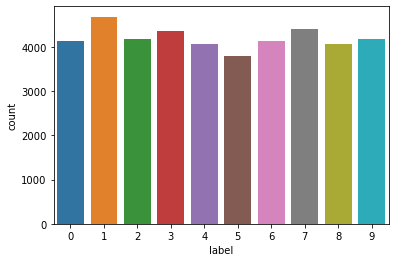

In [311]:
sns.countplot(data.label)

* From the above plot we do not see much of an imbalance in the data and hence it is unnecessary to balance the data

[] The data is seperated into predictors and variables.

[] The pixels are then normalized by dividing by 255.

In [312]:
X = data.drop(columns='label')
y = data.label


In [313]:
X.shape

(42000, 784)

In [314]:
X = X.values.reshape(X.shape[0],28,28)
xtest = testdata.values.reshape(testdata.shape[0],28,28)
y = y.values

In [315]:
X = X/255
xtest = xtest/255

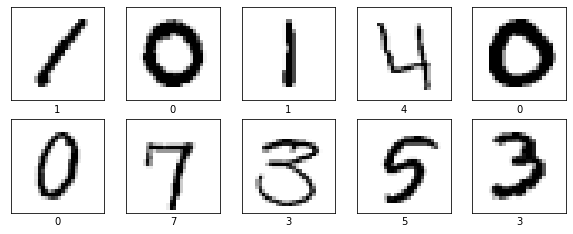

In [317]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(y[i])

In [318]:
y

array([1, 0, 1, ..., 7, 6, 9])

* After normalization, the data is ready to be fed to a neural network model.
* The data is split into train and validation set using train test split.
 

In [319]:
xtrain,xval,ytrain,yval = train_test_split(X,y,test_size=0.2,random_state=100)

### Model building

In [320]:
model = tf.keras.models.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(28,28)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(128,activation=tf.nn.relu),
                tf.keras.layers.Dense(84,activation=tf.nn.relu),
                #tf.keras.layers.Dense(32,activation=tf.nn.relu),
                tf.keras.layers.Dense(10,activation=tf.nn.softmax)
            ])

model.compile(optimizer = 'sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [321]:
class CustomCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        if logs.get('val_accuracy')>=0.98:
            self.model.stop_training = True

stop_early = CustomCallBack()

In [322]:
history = model.fit(xtrain,ytrain, epochs=20, batch_size=78,validation_data=(xval,yval))

Epoch 1/20
431/431 [==============================] - 1s 3ms/step - loss: 1.3252 - accuracy: 0.6690 - val_loss: 0.6756 - val_accuracy: 0.8350
Epoch 2/20
431/431 [==============================] - 1s 2ms/step - loss: 0.5225 - accuracy: 0.8675 - val_loss: 0.4409 - val_accuracy: 0.8815
Epoch 3/20
431/431 [==============================] - 1s 2ms/step - loss: 0.3957 - accuracy: 0.8921 - val_loss: 0.3730 - val_accuracy: 0.8957
Epoch 4/20
431/431 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.9027 - val_loss: 0.3358 - val_accuracy: 0.9036
Epoch 5/20
431/431 [==============================] - 2s 3ms/step - loss: 0.3154 - accuracy: 0.9122 - val_loss: 0.3141 - val_accuracy: 0.9074
Epoch 6/20
431/431 [==============================] - 1s 3ms/step - loss: 0.2943 - accuracy: 0.9174 - val_loss: 0.2985 - val_accuracy: 0.9136
Epoch 7/20
431/431 [==============================] - 2s 4ms/step - loss: 0.2780 - accuracy: 0.9220 - val_loss: 0.2833 - val_accuracy: 0.9175
Epoch 

In [323]:
test_loss = model.evaluate(xval, yval)
print(test_loss)

263/263 [==============================] - 0s 1ms/step - loss: 0.1919 - accuracy: 0.9420
[0.19194698333740234, 0.9420238137245178]


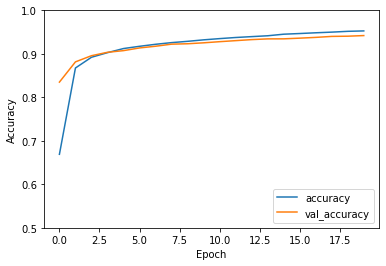

In [324]:

plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

In [325]:
predictions = np.argmax(model.predict(xtest),axis=1)